# Model Comparison
## Random Over Sampling

### Random Forest - Original Data set
### Random over sampling - Random Forest, Logistic Regression, XGBoost

In [5]:
#import libraries
import pandas as pd
import numpy as np

In [7]:
#loading data
df = pd.read_csv(r"C:\Users\Pulani\Desktop\NTUCLHUB\MYPROJECT_CAPSTONE\Project 1 - Finance - Predictive Analytics\Dataset\loan.csv")
print ("Data loaded successfully!")

# Display the first few rows of the dataset
df.head()

Data loaded successfully!


,customer_id,loan_id,loan_type,loan_amount,interest_rate,loan_term,employment_type,income_level,credit_score,gender,marital_status,education_level,application_date,approval_date,disbursement_date,due_date,default_status
0,CUST-00004912,LN00004170,Car Loan,16795,0.051852,15,Self-employed,Medium,833,Male,Single,Master,05-04-2018,23-04-2018,24-04-2018,14-08-2018,False
1,CUST-00004194,LN00002413,Personal Loan,1860,0.089296,56,Full-time,Medium,776,Female,Married,Bachelor,30-12-2022,31-12-2022,12-01-2023,05-04-2023,False
2,CUST-00003610,LN00000024,Personal Loan,77820,0.070470,51,Full-time,Low,697,Male,Divorced,High School,15-11-2019,18-11-2019,27-11-2019,24-02-2020,False
3,CUST-00001895,LN00001742,Car Loan,55886,0.062155,30,Full-time,Low,795,Female,Married,PhD,25-08-2021,08-09-2021,11-09-2021,25-02-2022,False
4,CUST-00003782,LN00003161,Home Loan,7265,0.070635,48,Part-time,Low,519,Female,Married,High School,02-09-2020,07-09-2020,11-09-2020,29-12-2020,False


In [9]:
# Set the reference date to January 1, 1970 (Unix Epoch)
reference_date = pd.to_datetime('1970-01-01')

# Convert date columns to datetime format, with day first
df['application_date'] = pd.to_datetime(df['application_date'], dayfirst=True)
df['approval_date'] = pd.to_datetime(df['approval_date'], dayfirst=True)
df['disbursement_date'] = pd.to_datetime(df['disbursement_date'], dayfirst=True)
df['due_date'] = pd.to_datetime(df['due_date'], dayfirst=True)

# Calculate the number of days since the reference date (Unix Epoch)
df['application_days'] = (df['application_date'] - reference_date).dt.days
df['approval_days'] = (df['approval_date'] - reference_date).dt.days
df['disbursement_days'] = (df['disbursement_date'] - reference_date).dt.days
df['due_days'] = (df['due_date'] - reference_date).dt.days

# Drop the original date columns
df = df.drop(['application_date', 'approval_date', 'disbursement_date', 'due_date'], axis=1)

# Check the updated DataFrame
print("Updated DataFrame after processing date columns:")
df.head()

Updated DataFrame after processing date columns:


,customer_id,loan_id,loan_type,loan_amount,interest_rate,loan_term,employment_type,income_level,credit_score,gender,marital_status,education_level,default_status,application_days,approval_days,disbursement_days,due_days
0,CUST-00004912,LN00004170,Car Loan,16795,0.051852,15,Self-employed,Medium,833,Male,Single,Master,False,17626,17644,17645,17757
1,CUST-00004194,LN00002413,Personal Loan,1860,0.089296,56,Full-time,Medium,776,Female,Married,Bachelor,False,19356,19357,19369,19452
2,CUST-00003610,LN00000024,Personal Loan,77820,0.070470,51,Full-time,Low,697,Male,Divorced,High School,False,18215,18218,18227,18316
3,CUST-00001895,LN00001742,Car Loan,55886,0.062155,30,Full-time,Low,795,Female,Married,PhD,False,18864,18878,18881,19048
4,CUST-00003782,LN00003161,Home Loan,7265,0.070635,48,Part-time,Low,519,Female,Married,High School,False,18507,18512,18516,18625


In [11]:
# Drop the customer_id and loan_id columns
df = df.drop(['customer_id', 'loan_id'], axis=1)

# Check the updated DataFrame
print("Updated DataFrame after dropping customer_id and loan_id:")
df.head()

Updated DataFrame after dropping customer_id and loan_id:


,loan_type,loan_amount,interest_rate,loan_term,employment_type,income_level,credit_score,gender,marital_status,education_level,default_status,application_days,approval_days,disbursement_days,due_days
0,Car Loan,16795,0.051852,15,Self-employed,Medium,833,Male,Single,Master,False,17626,17644,17645,17757
1,Personal Loan,1860,0.089296,56,Full-time,Medium,776,Female,Married,Bachelor,False,19356,19357,19369,19452
2,Personal Loan,77820,0.070470,51,Full-time,Low,697,Male,Divorced,High School,False,18215,18218,18227,18316
3,Car Loan,55886,0.062155,30,Full-time,Low,795,Female,Married,PhD,False,18864,18878,18881,19048
4,Home Loan,7265,0.070635,48,Part-time,Low,519,Female,Married,High School,False,18507,18512,18516,18625


In [13]:
from sklearn.preprocessing import LabelEncoder

# Initialize separate LabelEncoders for each column
income_encoder = LabelEncoder()
education_encoder = LabelEncoder()

# Apply LabelEncoder to income_level and education_level columns
df['income_level'] = income_encoder.fit_transform(df['income_level']) + 1
df['education_level'] = education_encoder.fit_transform(df['education_level']) + 1

# Optional: Print the mappings for verification
income_mapping = {label: num + 1 for num, label in enumerate(income_encoder.classes_)}
education_mapping = {label: num + 1 for num, label in enumerate(education_encoder.classes_)}

print("Income Level Mapping:")
print(income_mapping)

print("Education Level Mapping:")
print(education_mapping)

Income Level Mapping:
{'High': 1, 'Low': 2, 'Medium': 3}
Education Level Mapping:
{'Bachelor': 1, 'High School': 2, 'Master': 3, 'PhD': 4}


In [15]:
# Convert default_status (boolean) to int
df['default_status'] = df['default_status'].astype(int)

# One-hot encode remaining categorical columns
# Assuming the other categorical columns are 'loan_type', 'employment_type', 'gender', 'marital_status'
df = pd.get_dummies(df, columns=['loan_type', 'employment_type', 'gender', 'marital_status'], drop_first=True, dtype=int)


In [17]:
# Check the updated DataFrame
print("Updated DataFrame after one-hot encoding:")
df.head()

Updated DataFrame after one-hot encoding:


,loan_amount,interest_rate,loan_term,income_level,credit_score,education_level,default_status,application_days,approval_days,disbursement_days,due_days,loan_type_Education Loan,loan_type_Home Loan,loan_type_Personal Loan,employment_type_Part-time,employment_type_Self-employed,gender_Male,marital_status_Married,marital_status_Single
0,16795,0.051852,15,3,833,3,0,17626,17644,17645,17757,0,0,0,0,1,1,0,1
1,1860,0.089296,56,3,776,1,0,19356,19357,19369,19452,0,0,1,0,0,0,1,0
2,77820,0.070470,51,2,697,2,0,18215,18218,18227,18316,0,0,1,0,0,1,0,0
3,55886,0.062155,30,2,795,4,0,18864,18878,18881,19048,0,0,0,0,0,0,1,0
4,7265,0.070635,48,2,519,2,0,18507,18512,18516,18625,0,1,0,1,0,0,1,0


In [21]:
# Import required libraries for machine learning models and evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [23]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = df.drop('default_status', axis=1)  # Features (drop the target column)
y = df['default_status']  # Target (the column we want to predict)

# Perform the train-test split (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the training and testing sets
print("Training set shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Testing set shape (X_test, y_test):", X_test.shape, y_test.shape)

Training set shape (X_train, y_train): (4000, 18) (4000,)
Testing set shape (X_test, y_test): (1000, 18) (1000,)


Confusion Matrix:
[[1199    1]
 [ 300    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1200
           1       0.00      0.00      0.00       300

    accuracy                           0.80      1500
   macro avg       0.40      0.50      0.44      1500
weighted avg       0.64      0.80      0.71      1500



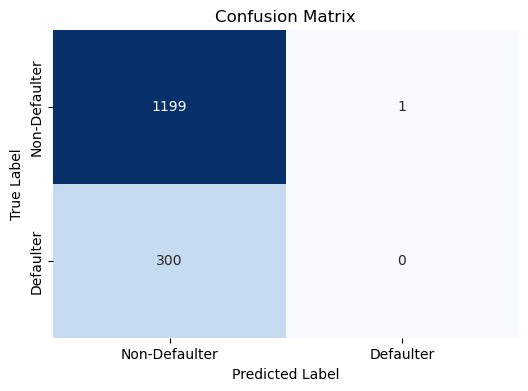

In [25]:
#Random Forest 80/20

# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Separating features (X) and the target (y)
X = df.drop('default_status', axis=1)  # Features
y = df['default_status']  # Target

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Creating the Random Forest model
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Fitting the model
rf_model.fit(X_train, y_train)

# Predicting on the test set
y_pred = rf_model.predict(X_test)

# Evaluating the model with classification report and confusion matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=['Non-Defaulter', 'Defaulter'], 
            yticklabels=['Non-Defaulter', 'Defaulter'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [27]:
# Check class distribution 
print("Class distribution: ")
print(y.value_counts())

Class distribution: 
default_status
0    4001
1     999
Name: count, dtype: int64


In [29]:
#RAndom Over Sampling

from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

In [31]:
# Checking class distribution after oversampling
print(pd.Series(y_resampled).value_counts())

default_status
0    4001
1    4001
Name: count, dtype: int64


Confusion Matrix:
[[805  19]
 [ 25 752]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       824
           1       0.98      0.97      0.97       777

    accuracy                           0.97      1601
   macro avg       0.97      0.97      0.97      1601
weighted avg       0.97      0.97      0.97      1601



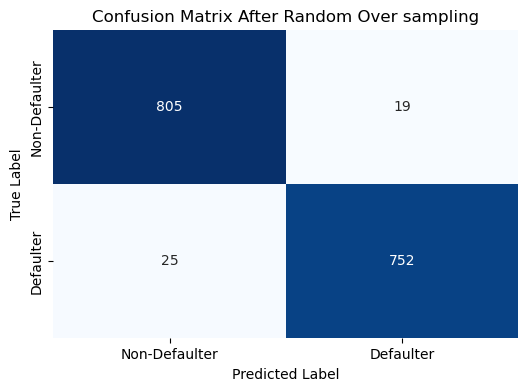

In [33]:
# Importing necessary libraries
#Random Forest After 80/20 random oversampling
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Separating features (X) and the target (y)
X = df.drop('default_status', axis=1)  # Features
y = df['default_status']  # Target

# Splitting the oversampled dataset into train and test sets(80/20)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Creating the Random Forest model
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Fitting the model
rf_model.fit(X_train, y_train)

# Predicting on the test set
y_pred = rf_model.predict(X_test)

# Evaluating the model with classification report and confusion matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=['Non-Defaulter', 'Defaulter'], 
            yticklabels=['Non-Defaulter', 'Defaulter'])
plt.title("Confusion Matrix After Random Over sampling")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [33]:
print(rf_model.feature_importances_)
print(X.columns)

[0.11749265 0.11762144 0.09407489 0.02728641 0.11544043 0.03558156
 0.09324978 0.09020485 0.09221134 0.10146836 0.01358026 0.01462011
 0.01318501 0.01507491 0.0146802  0.01443134 0.01457242 0.01522403]
Index(['loan_amount', 'interest_rate', 'loan_term', 'income_level',
       'credit_score', 'education_level', 'application_days', 'approval_days',
       'disbursement_days', 'due_days', 'loan_type_Education Loan',
       'loan_type_Home Loan', 'loan_type_Personal Loan',
       'employment_type_Part-time', 'employment_type_Self-employed',
       'gender_Male', 'marital_status_Married', 'marital_status_Single'],
      dtype='object')


Feature importances:
interest_rate: 0.1176214443556396
loan_amount: 0.11749264782237748
credit_score: 0.11544042636267432
due_days: 0.10146835680805735
loan_term: 0.09407489373186036
application_days: 0.09324978270949871
disbursement_days: 0.09221134278102218
approval_days: 0.09020484700171123
education_level: 0.03558156166023239
income_level: 0.02728641401550669
marital_status_Single: 0.01522403162774567
employment_type_Part-time: 0.015074913441443122
employment_type_Self-employed: 0.014680202842433713
loan_type_Home Loan: 0.014620108881246171
marital_status_Married: 0.014572423925107377
gender_Male: 0.014431335853641416
loan_type_Education Loan: 0.013580255022491692
loan_type_Personal Loan: 0.013185011157310361


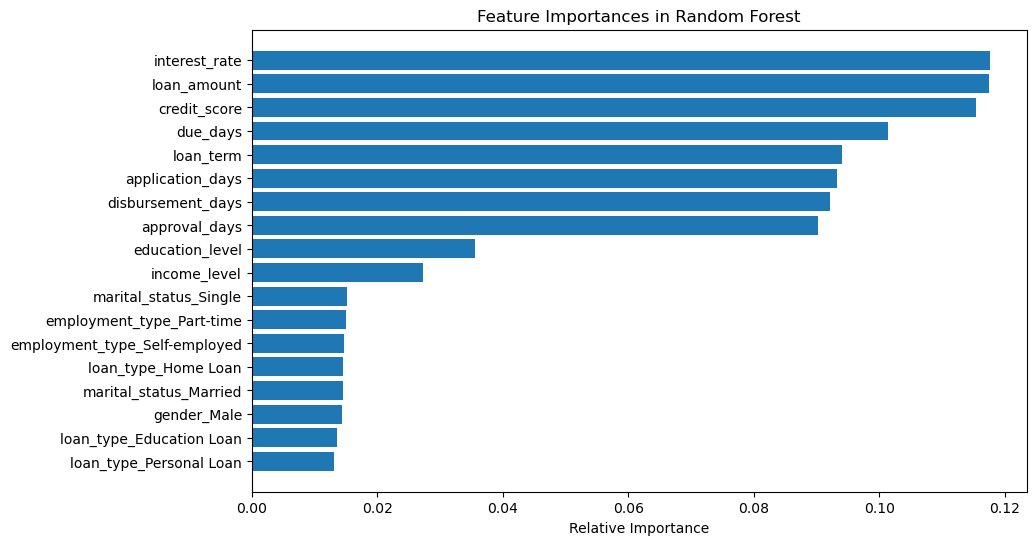

In [35]:
# feature importance: The feature importance score indicates how much a feature contributes to the model's predictions.

# Get feature importance from the trained Random Forest model
import matplotlib.pyplot as plt
import numpy as np

# Extracting feature importances
importances = rf_model.feature_importances_

# Getting the column names for X
features = X.columns

# Sorting the features by importance
indices = np.argsort(importances)[::-1]

# Printing feature importance scores
print("Feature importances:")
for i in indices:
    print(f"{features[i]}: {importances[i]}")

# Plotting the feature importances for visualization
plt.figure(figsize=(10, 6))
plt.title("Feature Importances in Random Forest")
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Relative Importance")
plt.gca().invert_yaxis()  # Reverse the order to have the most important at the top
plt.show()


In [ ]:
# Can do shap value analysis if needed


Confusion Matrix:
[[429 395]
 [349 428]]

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.52      0.54       824
           1       0.52      0.55      0.54       777

    accuracy                           0.54      1601
   macro avg       0.54      0.54      0.54      1601
weighted avg       0.54      0.54      0.54      1601



C:\Users\Pulani\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


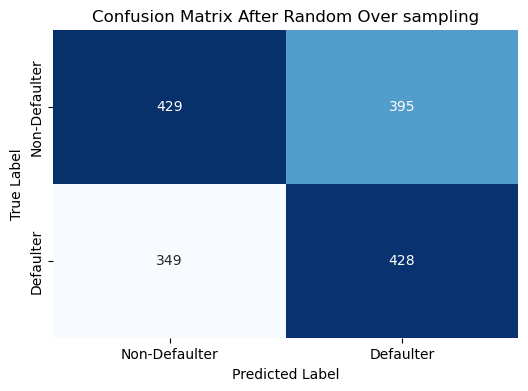

In [35]:
#Logistic Regression 80/20 after Oversampling

# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Assuming 'data' is your DataFrame
# Separating features (X) and the target (y)
X = df.drop('default_status', axis=1)  # Features
y = df['default_status']  # Target

# Handling class imbalance using Random Oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Splitting the oversampled dataset into train and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Creating the Logistic Regression model
lr_model = LogisticRegression(random_state=42, max_iter=5000, class_weight='balanced')

# Fitting the model
lr_model.fit(X_train, y_train)

# Predicting on the test set
y_pred = lr_model.predict(X_test)

# Evaluating the model with classification report and confusion matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=['Non-Defaulter', 'Defaulter'], 
            yticklabels=['Non-Defaulter', 'Defaulter'])
plt.title("Confusion Matrix After Random Over sampling")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


**This warning seeing suggests that the LogisticRegression model has reached the maximum number of iterations before convergence. 
- can address by increasing max_iter or scaling data
- increasing max_iter didn't help


Confusion Matrix:
[[444 380]
 [354 423]]

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.54      0.55       824
           1       0.53      0.54      0.54       777

    accuracy                           0.54      1601
   macro avg       0.54      0.54      0.54      1601
weighted avg       0.54      0.54      0.54      1601



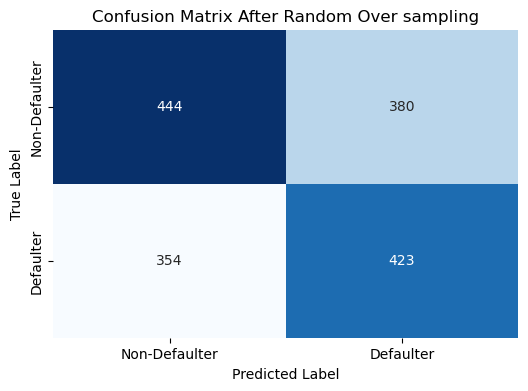

In [37]:
#Logistic Regression 80/20 after Oversampling, and scaling

# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Assuming 'data' is your DataFrame
# Separating features (X) and the target (y)
X = df.drop('default_status', axis=1)  # Features
y = df['default_status']  # Target

# Handling class imbalance using Random Oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Splitting the oversampled dataset into train and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform the training data
X_test_scaled = scaler.transform(X_test)  # Transform the test data using the same scaler

# Creating the Logistic Regression model
lr_model = LogisticRegression(random_state=42, max_iter=5000, class_weight='balanced')

# Fitting the model on scaled data
lr_model.fit(X_train_scaled, y_train)

# Predicting on the test set (also scaled)
y_pred = lr_model.predict(X_test_scaled)

# Evaluating the model with classification report and confusion matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=['Non-Defaulter', 'Defaulter'], 
            yticklabels=['Non-Defaulter', 'Defaulter'])
plt.title("Confusion Matrix After Random Over sampling")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [57]:
from collections import Counter

# Checking the class distribution after oversampling
print("Class distribution after oversampling:")
print(Counter(y_resampled))  # Distribution after oversampling

Class distribution after oversampling:
Counter({0: 4001, 1: 4001})


Class distribution after oversampling:
Counter({0: 4001, 1: 4001})
Confusion Matrix:
[[674 150]
 [ 33 744]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.82      0.88       824
           1       0.83      0.96      0.89       777

    accuracy                           0.89      1601
   macro avg       0.89      0.89      0.89      1601
weighted avg       0.89      0.89      0.89      1601



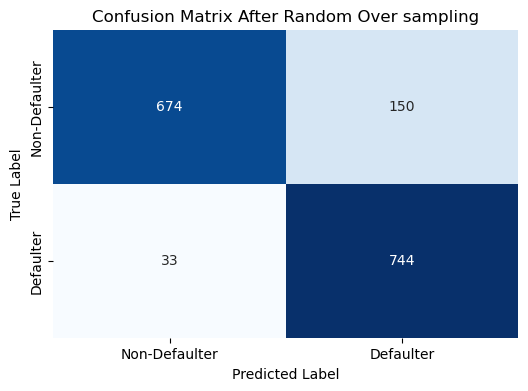

In [39]:
#XGBoost after random oversampling 80/20

# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Separating features (X) and the target (y)
X = df.drop('default_status', axis=1)  # Features
y = df['default_status']  # Target

# Handling class imbalance using Random Oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Checking class distribution after oversampling
print("Class distribution after oversampling:")
print(Counter(y_resampled))

# Splitting the oversampled dataset into train and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Creating the XGBoost model
xgb_model = XGBClassifier(random_state=42, scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]))

# Fitting the model
xgb_model.fit(X_train, y_train)

# Predicting on the test set
y_pred = xgb_model.predict(X_test)

# Evaluating the model with classification report and confusion matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=['Non-Defaulter', 'Defaulter'], 
            yticklabels=['Non-Defaulter', 'Defaulter'])
plt.title("Confusion Matrix After Random Over sampling")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


### Model Evaluation

In [67]:
# Results Comparison Among the models

import pandas as pd

# Create the data for model comparison after random oversampling
data = {
    'Model': ['Logistic Regression', 'XGBoost', 'Random Forest'],
    'Accuracy': [0.54, 0.89, 0.97],
    'Precision (Class 0)': [0.56, 0.95, 0.97],
    'Recall (Class 0)': [0.54, 0.82, 0.98],
    'F1-Score (Class 0)': [0.55, 0.88, 0.97],
    'Precision (Class 1)': [0.53, 0.83, 0.98],
    'Recall (Class 1)': [0.54, 0.96, 0.97],
    'F1-Score (Class 1)': [0.54, 0.89, 0.97]
}

# Create a DataFrame
df_results = pd.DataFrame(data)

# Display the DataFrame
df_results

,Model,Accuracy,Precision (Class 0),Recall (Class 0),F1-Score (Class 0),Precision (Class 1),Recall (Class 1),F1-Score (Class 1)
0,Logistic Regression,0.54,0.56,0.54,0.55,0.53,0.54,0.54
1,XGBoost,0.89,0.95,0.82,0.88,0.83,0.96,0.89
2,Random Forest,0.97,0.97,0.98,0.97,0.98,0.97,0.97


### With highest precision and recall Random forest is the best one with accuracy 97%

#### Why Random Forest performed the best:
- **Ensemble Learning:** Random Forest combines the predictions of multiple decision trees to make a final prediction, leading to better generalization and performance.
- **Handling Class Imbalance:** It handles imbalanced classes well, especially when class_weight='balanced' is used, as the model adjusts for the imbalance in the data.
- **Overfitting Control:** Random Forest reduces overfitting by averaging multiple decision trees, improving the overall performance on unseen data.